# ENGR-E 221 Homework 5: Unsupervised Learning using Clustering


## Homework Details

Make sure all the source code is complete and working inside the notebook. It is best to save the notebook with ALL plots and outputs visible.

## 1: Load and Explore the IRIS Dataset (10 points)

```python
iris = datasets.load_iris()
```
A. How many features are in the dataset?

B. What is the class label and what does it represent?

C. How many classes are there is the dataset?

D. How many number of records are in the dataset?

E. Is all data numeric or are there categorical columns present?


### 1 Answers

your answers here.

In [1]:
# code for A-E here
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
features = iris.data.shape[1]
label = iris.target
label_rep = iris.target_names
num_c = len(label_rep)
num_r = iris.data.shape[0]
print(features)
print(label)
print(label_rep)
print(num_c)
print(num_r)
#after looking at the results of the above code we can conclude that all data is numerical in isis
print('all data is numerical')
iris_df= pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.head()

4
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']
3
150
all data is numerical


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## 2: Data Visualization (5 points)

A) Show the distributions for all the features. Discuss what you see in 3-5 sentences.

B) Show how different feature combinations represent data in a two dimensional domain by plotting data on the x-y plane using two features on each plot. (We expect 6 plots) Discuss what you see in 3-5 sentences. Think about the application of different classification/regression techniques.  

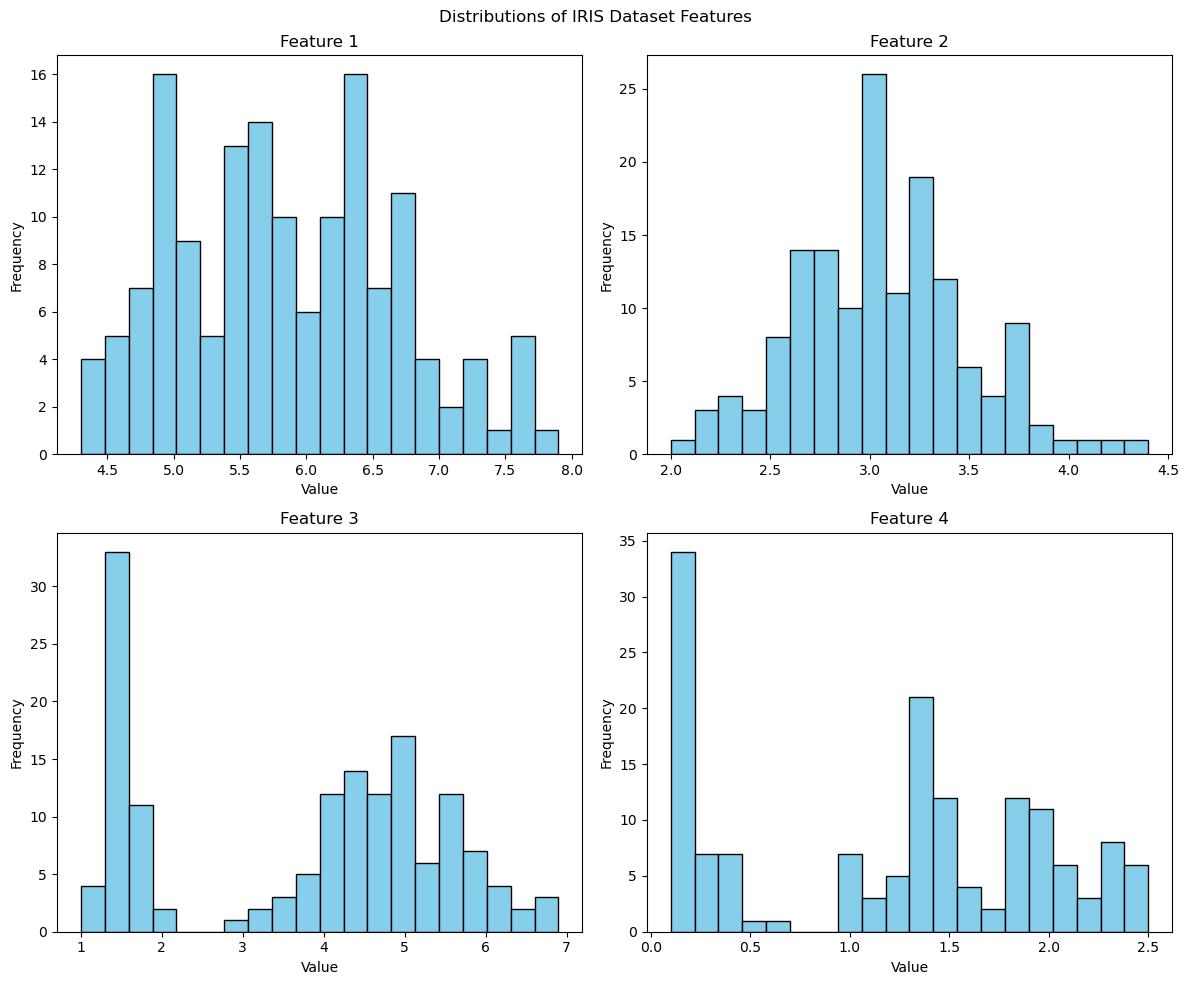

IndexError: index 2 is out of bounds for axis 1 with size 2

In [3]:
# distrubutions and plots here
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Distributions of IRIS Dataset Features')

for i in range(features):
    row = i // 2
    col = i % 2
    axes[row, col].hist(iris.data[:, i], bins=20, color='skyblue', edgecolor='black')
    axes[row, col].set_title(f'Feature {i+1}')
    axes[row, col].set_xlabel('Value')
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

combinations = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

for i, (x_feat, y_feat) in enumerate(combinations):
    row = i // 3
    col = i % 3
    for target_class in range(num_c):
        class_data = iris.data[label == target_class]
        axes[row, col].scatter(class_data[:, x_feat], class_data[:, y_feat], label=f'Class {target_class}')
    axes[row, col].set_xlabel(f'Feature {x_feat+1}')
    axes[row, col].set_ylabel(f'Feature {y_feat+1}')
    axes[row, col].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 2 Discussion

your discussion here.

## 3:  Data Clustering (10 points)

Use K-means clustering to cluster this data into 2,3,4 and 5 clusters. What is the best choice for the value of K? Expalin your choice of K. Include the Davies-Bouldin score and silhouette coefficient (See Lab 5 for documentation and examples). You can use figures and sentences to support this.

In [ ]:
# place clustering results here
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.datasets import make_blobs
#fixing graph attempt 1:
X, y = make_blobs (n_samples=1000,centers=[[-1,-1], [0,0]], cluster_std=[0.5, 0.1], random_state =1)
#training data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9)

K = range(2, 6)

fits = []
score = []
db = []

#For each k value in our range of K, fit using Kmeans, append the model to our "fits" list, calculate the silhouette_score and wcss values into "scores" and "wcss"
for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 1, n_init='auto').fit(X_train)
    # append the model to fits
    fits.append(model)
    print("Clusters:", k)
    # Append the silhouette score to scores
    score.append(silhouette_score(X_train, model.labels_, metric='euclidean'))
    print(silhouette_score(X_train, model.labels_, metric='euclidean'))
    db.append(metrics.davies_bouldin_score(X_train, model.labels_))
    print(metrics.davies_bouldin_score(X_train, model.labels_))
plt.figure(figsize=(10,5))

plt.plot(K, score)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score over K')
plt.show()

plt.plot(K, db)
plt.title('Davies Bouldin Score')
plt.xlabel('Number of clusters')
plt.ylabel('Davies Bouldin Score over K')
plt.show()



### 3 Discussion

your discussion here.

## 4: Visualize Clusters (10 points)

A. Visualize clusters from different vantage points by plotting it against two features at a time. (six plots)

B. Make sure the plots are visable in the notebook no need to submit addional figures.

In [ ]:
combinations = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
feature_labels = [f'Feature {comb[0]+1} vs Feature {comb[1]+1}' for comb in combinations]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Feature Combinations in a Two-Dimensional Domain')

colors = ['tab:blue', 'tab:orange', 'tab:green']

for i, (x_feat, y_feat) in enumerate(combinations):
    row = i // 3
    col = i % 3
    for target_class in range(num_c):
        class_data = iris.data[label == target_class]
        axes[row, col].scatter(class_data[:, x_feat], class_data[:, y_feat], color=colors[target_class], label=f'Class {target_class}')
    axes[row, col].set_title(feature_labels[i])
    axes[row, col].set_xlabel(f'Feature {x_feat+1}')
    axes[row, col].set_ylabel(f'Feature {y_feat+1}')
    axes[row, col].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 4 Discussion

your discussion here.

## 5: Accuracy of Data Classification using clustering (semi-supervised learning) (10 points)

Since we already have class labels availabe to us built into the python Iris dataset we can determine if data is being clustered within the correct label. Calculate the
accuracy of this classification for at least three different values of k. Is you selection of k from problem 4 correct? Please discuss these results and feel free to use any other metrics discussed in lecture and lab to support this discussion.  (Hint: it is easier for this data since data is sorted based on classes, So we just need to identify records which were put in wrong cluster by k means. )

In [ ]:
for k in range(2,6):
    clu_kmeans=KMeans(n_clusters=k, random_state=9).fit(X_train)
    pred_label = clu_kmeans.predict(X_test)
    score = metrics.accuracy_score(y_test,pred_label)
    print('for k=',k, "score =",score)

### 5 discussion here

your discussion here

## 6: Limitations of kmeans  (5 points)
We have provided you with a classic example of two half moons. Apply kmeans clustering to these data and in your own words discuss the limitations of kmeans. Use the Davies-Bouldin score and silhouette coefficient along with any other metrics you may find useful for the discussion.

In [ ]:
# 6 moon data
import sklearn.datasets
import matplotlib.pyplot as plt
X,y = sklearn.datasets.make_moons(n_samples=1000, noise=0.05)
plt.scatter(X[:,0],X[:,1], c=y)


In [ ]:
# Students kmeans using moon data
from sklearn.cluster import KMeans
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9)
clu_kmeans = KMeans(n_clusters=2,n_init=1, random_state = 9).fit(X_train)
y_pred =clu_kmeans.predict(X_test)
centers_ = clu_kmeans.cluster_centers_
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.scatter(centers_[:,0],centers_[:,1], c='black', s=200, alpha=0.5)
plt.show()
print("Centers found by Kmeans:")
print(centers_)